In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ours_spectral import OurSpectral

n_samples = 1000
n_basis = 3
delta = 1e-5

ours_spectral = OurSpectral(basis='Legendre', n_basis=n_basis)

grad_ours_MC, grad_finite_diff = ours_spectral.demo_finite_diff(
    n_samples=n_samples, delta=delta, is_MC=True)

grad_ours_integrate, grad_finite_diff = ours_spectral.demo_finite_diff(
    n_samples=n_samples, delta=delta, is_MC=False)

print("basis: ", ours_spectral.basis)
print("n_samples: ", n_samples)
print("finite difference: ")
print(grad_finite_diff)
print("ours MC: ")
print(grad_ours_MC.mean(0))
print("ours integration: ")
print(grad_ours_integrate.mean(0))

a = grad_ours_integrate.mean(0)
b = grad_finite_diff

norm = lambda x: np.sqrt((x**2).sum(1))
cos_value = (a * b).sum(1) / norm(a) / norm(b)
angles = np.arccos(cos_value)
ours_over_FD = norm(a) / norm(b)
print("angles: ", angles)
print("ours_over_FD: ", ours_over_FD)


basis:  Legendre
n_samples:  1000
finite difference: 
[[ 0.26081988  0.17041945 -0.02302575]
 [-0.63937363 -0.17042685  0.02301845]]
ours MC: 
[[ 0.28001132  0.17396804 -0.02390547]
 [-0.65803379 -0.18490293  0.03202598]]
ours integration: 
[[ 0.26083412  0.17001843 -0.02297046]
 [-0.63885481 -0.17004963  0.02333466]]
angles:  [0.00110765 0.00061729]
ours_over_FD:  [0.99932538 0.99911343]


In [2]:
i_Hs = 1
i_Basis = 1
print(grad_ours_integrate[:, i_Hs, i_Basis].std(), grad_ours_integrate[:, i_Hs, i_Basis].mean())
print(grad_ours_MC[:, i_Hs, i_Basis].std(), grad_ours_MC[:, i_Hs, i_Basis].mean())
# plt.plot(grad_ours_integrate[i_Hs])
print(grad_ours_integrate.shape)
print(grad_ours_MC.shape)

0.37333549514595477 -0.1700496345170688
0.3729947758429814 -0.1849029342235008
(1000, 2, 3)
(1000, 2, 3)


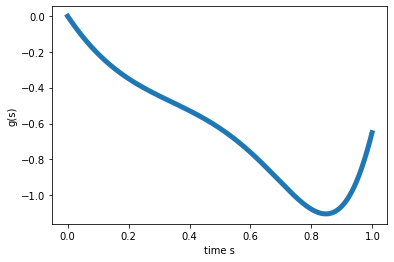

In [3]:
i_Hs = 1
i_Basis = 0
xx = np.arange(grad_ours_integrate[:, i_Hs, i_Basis].shape[0])
xx = xx / xx.shape[0]
plt.plot(xx, grad_ours_integrate[:, i_Hs, i_Basis],linewidth=5)

plt.ylabel('g(s)')
plt.xlabel('time s')

params = {'legend.fontsize': 25,
          'figure.figsize': (12, 9),
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':25,
         'ytick.labelsize':25}
plt.savefig("{}curve_{}.png".format('./logs/', 'curve_gs{}_{}'.format(i_Hs, i_Basis)))

In [6]:
print(grad_finite_diff)

[[ 0.26081988  0.17041945 -0.02302575]
 [-0.63937363 -0.17042685  0.02301845]]


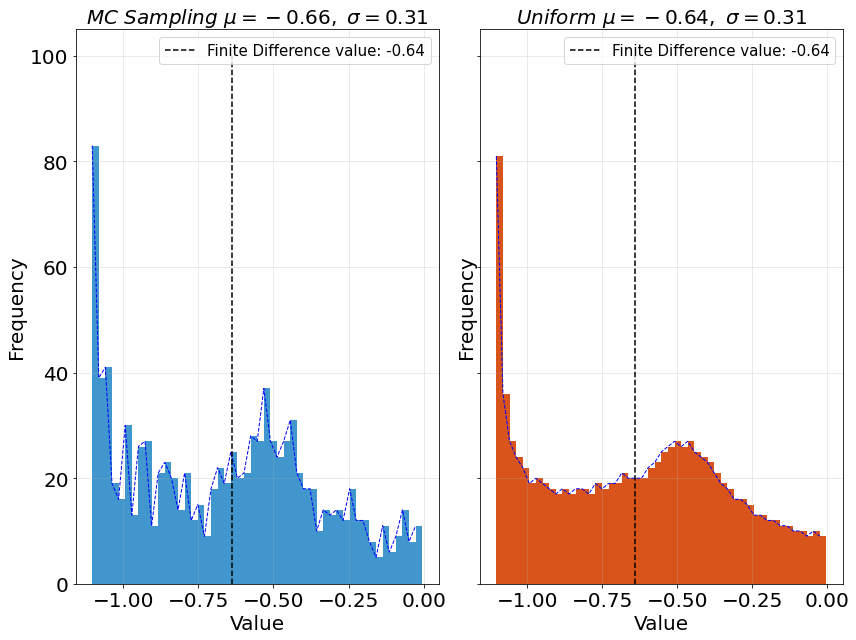

In [19]:
i_Hs = 1
i_Basis = 0

n_bins = 50

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

colors = [
    [0, 0.45, 0.74],
    [0.85, 0.33, 0.1],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880]
]


# We can set the number of bins with the *bins* keyword argument.
color = colors[0]
prob, bins, patches = axs[0].hist(
    grad_ours_MC[:, i_Hs, i_Basis], 
    bins=n_bins, 
    facecolor=color,
    alpha=0.75)
y = prob
l = axs[0].plot(bins[:-1], prob, 'b--', linewidth=1)
axs[0].grid(alpha=0.3)
axs[0].vlines(grad_finite_diff[i_Hs][i_Basis], 0, 100, 
              linestyles ="dashed", colors ="k", 
              label='Finite Difference value: {:.2f}'.format(grad_finite_diff[i_Hs][i_Basis]))
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title(r'$MC\ Sampling\ \mu={:.2f},\ \sigma={:.2f}$'.format(
    grad_ours_MC[:, i_Hs, i_Basis].mean(), 
    grad_ours_MC[:, i_Hs, i_Basis].std()))
axs[0].legend()

color = colors[1]
prob, bins, patches = axs[1].hist(
    grad_ours_integrate[:, i_Hs, i_Basis], 
    bins=n_bins, 
    facecolor=color)
y = prob
l = axs[1].plot(bins[:-1], prob, 'b--', linewidth=1)
axs[1].grid(alpha=0.3)
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title(r'$Uniform\ \mu={:.2f},\ \sigma={:.2f}$'.format(
    grad_ours_integrate[:, i_Hs, i_Basis].mean(), 
    grad_ours_integrate[:, i_Hs, i_Basis].std()))
axs[1].vlines(grad_finite_diff[i_Hs][i_Basis], 0, 100, 
              linestyles ="dashed", colors ="k", 
              label='Finite Difference value: {:.2f}'.format(grad_finite_diff[i_Hs][i_Basis]))
axs[1].legend()


params = {'legend.fontsize': 15,
          'figure.figsize': (12, 9),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
plt.rcParams.update(params)
plt.savefig("{}curve_{}.png".format('./logs/', 'hist_MC'))
